<a href="https://colab.research.google.com/github/YasinnSoylu/Ichimoku_Kinko_Hyo_Y-ntemi./blob/main/Ichimoku_Kinko_Hyo_Y%C3%B6ntemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ichimoku Kinko Hyo

Ichimoku Kinko Hyo, also known as Ichimoku Cloud, is a technical analysis indicator developed by Japanese journalist Goichi Hosoda in the late 1930s. It provides a comprehensive view of price action, identifying support and resistance levels, momentum, and trend direction. The name "Ichimoku Kinko Hyo" can be translated as "equilibrium chart at a glance," highlighting its purpose of simplifying the interpretation of market data.

The Ichimoku Cloud consists of five components, including two lines of averages and a shaded area, which together form a cloud-like structure. The first component, Tenkan-Sen, is the average of the highest high and the lowest low over the last nine periods. The second component, Kijun-Sen, is the average of the highest high and lowest low over the last 26 periods. The third component, Senkou Span A, is the average of Tenkan-Sen and Kijun-Sen, plotted 26 periods ahead. The fourth component, Senkou Span B, is the average of the highest high and lowest low over the last 52 periods, plotted 26 periods ahead. Finally, the fifth component is the Chikou Span, which is the closing price of the current period plotted 26 periods behind.

When the price is above the cloud, it is considered to be in an uptrend, and when it is below the cloud, it is in a downtrend. The position of the Tenkan-Sen and Kijun-Sen lines relative to each other can also provide buy and sell signals. A bullish signal is generated when the Tenkan-Sen crosses above the Kijun-Sen, and a bearish signal is generated when the Tenkan-Sen crosses below the Kijun-Sen. Additionally, the Senkou Span A and Senkou Span B lines can act as support and resistance levels.

Overall, the Ichimoku Cloud is a versatile indicator that can be used to identify trend direction, support and resistance levels, and potential buy and sell signals. It is a popular tool among traders and is often used in conjunction with other indicators to confirm trading decisions.

In [85]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [86]:
# Download the stock prices for Microsoft (MSFT) for the specified date range.
# The date range is from 2018-01-01 to 2023-04-07, with data sampled every 5 days.
msft = yf.download('tsla', start='2023-05-01', end='2023-06-01', interval='1h')

# Assign the data from the "High" column to the variable "high".
high = msft['High']

# Assign the data from the "Low" column to the variable "low".
low = msft['Low']

# Assign the data from the "Close" column to the variable "close".
close = msft['Close']


[*********************100%***********************]  1 of 1 completed


In [87]:
# Calculate the Tenkan-sen line, a short-term moving average used in the Ichimoku Kinko Hyo indicator.
# It's calculated by taking the highest high and lowest low over the past 9 periods and averaging them.
tenkan_sen = (high.rolling(window=9).max() + low.rolling(window=9).min()) / 2

# Calculate the Kijun-sen line, a long-term moving average used in the Ichimoku Kinko Hyo indicator.
# It's calculated by taking the highest high and lowest low over the past 26 periods and averaging them.
kijun_sen = (high.rolling(window=26).max() + low.rolling(window=26).min()) / 2

# Calculate the Senkou Span A, which is the average of the Tenkan-sen and Kijun-sen lines, shifted forward 26 periods.
# This line is part of the Ichimoku Kinko Hyo indicator and is used to measure future price momentum.
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)

# Calculate the Senkou Span B, which is the midpoint of the 52-period high and low, shifted forward 26 periods.
# This line is part of the Ichimoku Kinko Hyo indicator and is used to measure future price momentum.
senkou_span_b = ((high.rolling(window=52).max() + low.rolling(window=52).min()) / 2).shift(26)



In [88]:
# Define a function called "ichimoku" which takes in a DataFrame called "dataframe" and several optional parameters
def ichimoku(dataframe, conversion_period=9, base_period=26, lagging_span=52, displacement=26):

    # Calculate the Tenkan-sen line using the "rolling" method to get the high and low prices over a specified period
    period_high = dataframe['High'].rolling(window=conversion_period).max()
    period_low = dataframe['Low'].rolling(window=conversion_period).min()
    tenkan_sen = (period_high + period_low) / 2

    # Calculate the Kijun-sen line using a similar process to the Tenkan-sen line
    period_high = dataframe['High'].rolling(window=base_period).max()
    period_low = dataframe['Low'].rolling(window=base_period).min()
    kijun_sen = (period_high + period_low) / 2

    # Calculate the Senkou Span A line by averaging the Tenkan-sen and Kijun-sen lines and shifting the result forward by a specified displacement
    senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(displacement)

    # Calculate the Senkou Span B line using a similar process to the Senkou Span A line but with a longer time period
    period_high = dataframe['High'].rolling(window=lagging_span).max()
    period_low = dataframe['Low'].rolling(window=lagging_span).min()
    senkou_span_b = ((period_high + period_low) / 2).shift(displacement)

    # Calculate the Chikou Span line by shifting the closing prices back by a specified displacement
    chikou_span = dataframe['Close'].shift(-displacement)

    # Add the calculated lines as new columns to the input DataFrame
    dataframe['Tenkan-Sen'] = tenkan_sen
    dataframe['Kijun-Sen'] = kijun_sen
    dataframe['Senkou Span A'] = senkou_span_a
    dataframe['Senkou Span B'] = senkou_span_b
    dataframe['Chikou Span'] = chikou_span

    # Return the modified DataFrame
    return dataframe


In [89]:
# Calculate Ichimoku Kinko Hyo indicators
msft_ichimoku = ichimoku(msft)

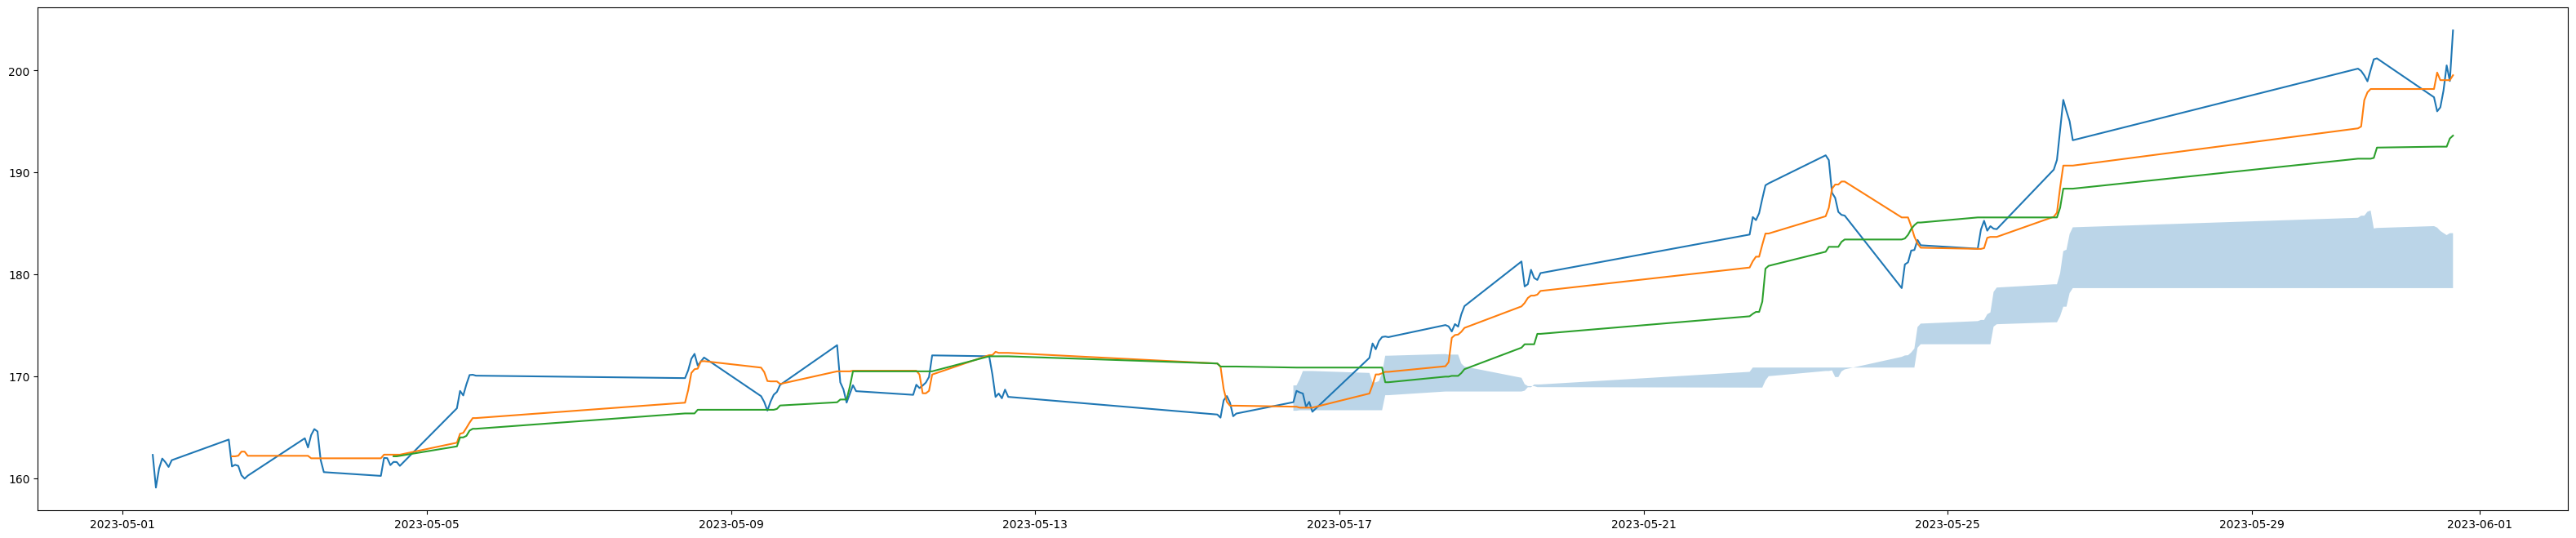

In [90]:
# Create a plot of the closing prices and the Ichimoku Kinko Hyo indicators

plt.figure(figsize=(40,8))
plt.plot(close, label='Close')
plt.plot(tenkan_sen, label='Tenkan-Sen')
plt.plot(kijun_sen, label='Kijun-Sen')
plt.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, alpha=0.3, label='Cloud')

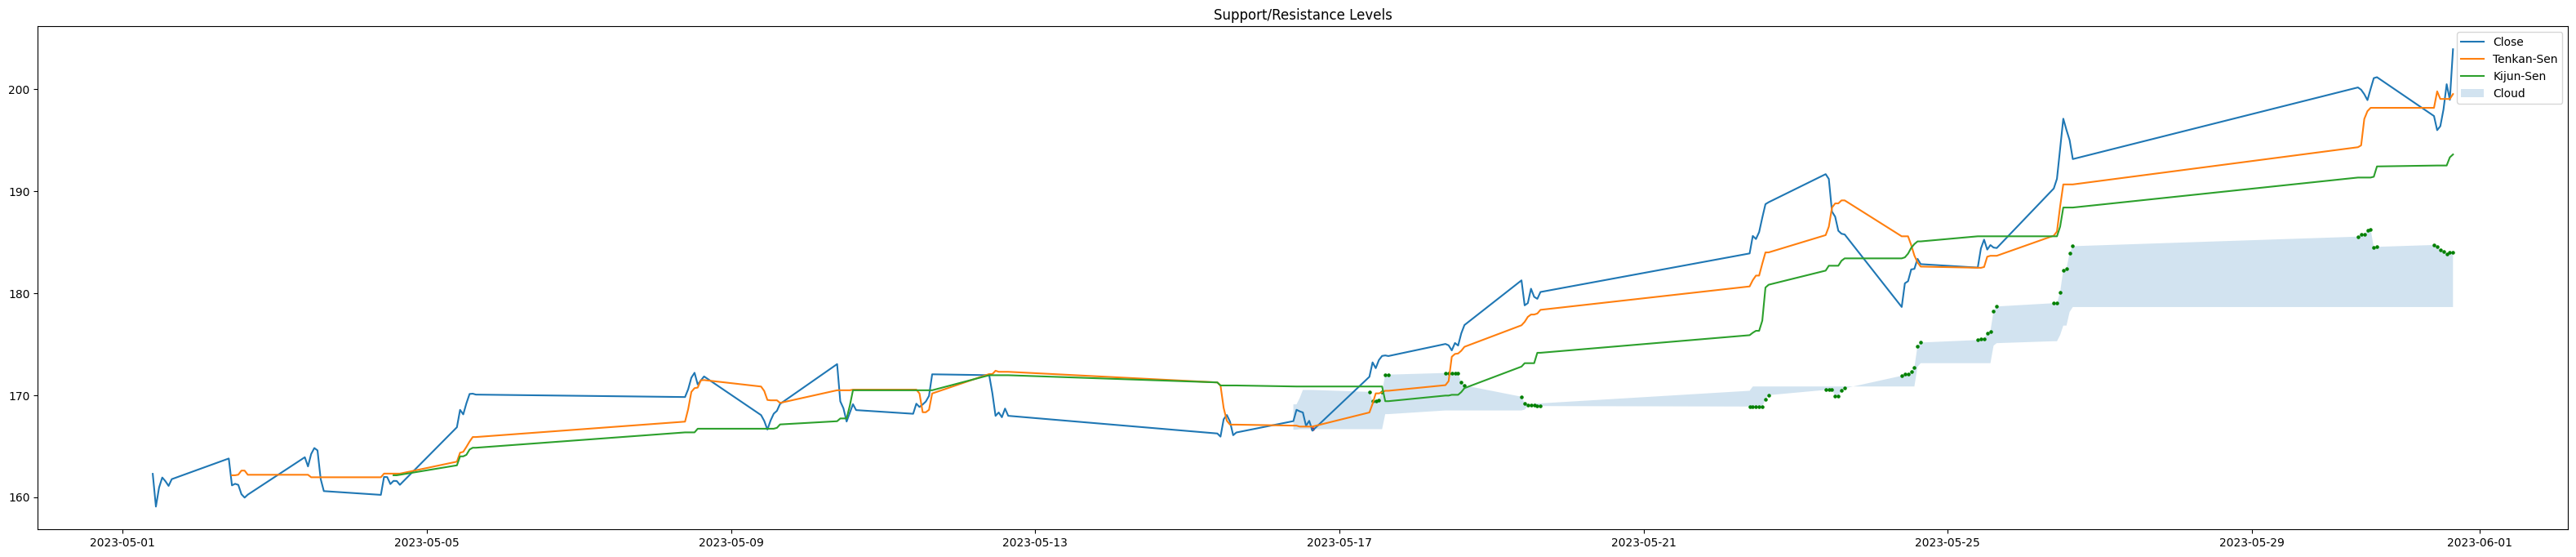

In [91]:
# Plotting the charts
plt.figure(figsize=(40,8))
plt.plot(close, label='Close')
plt.plot(tenkan_sen, label='Tenkan-Sen')
plt.plot(kijun_sen, label='Kijun-Sen')
plt.fill_between(senkou_span_a.index, senkou_span_a, senkou_span_b, alpha=0.2, label='Cloud')

# Marking support/resistance levels
for i in range(len(msft)):
  # If the close is above both Senkou Span A and B, it is a strong bullish signal and a potential support level.
  if close[i] > senkou_span_a[i] and close[i] > senkou_span_b[i]:
    plt.scatter(msft.index[i], senkou_span_a[i], color='green', s=5)
  # If the close is below both Senkou Span A and B, it is a strong bearish signal and a potential resistance level.
  elif close[i] < senkou_span_a[i] and close[i] < senkou_span_b[i]:
    plt.scatter(msft.index[i], senkou_span_b[i], color='red',s=5)

plt.legend()
plt.title('Support/Resistance Levels')
plt.show()

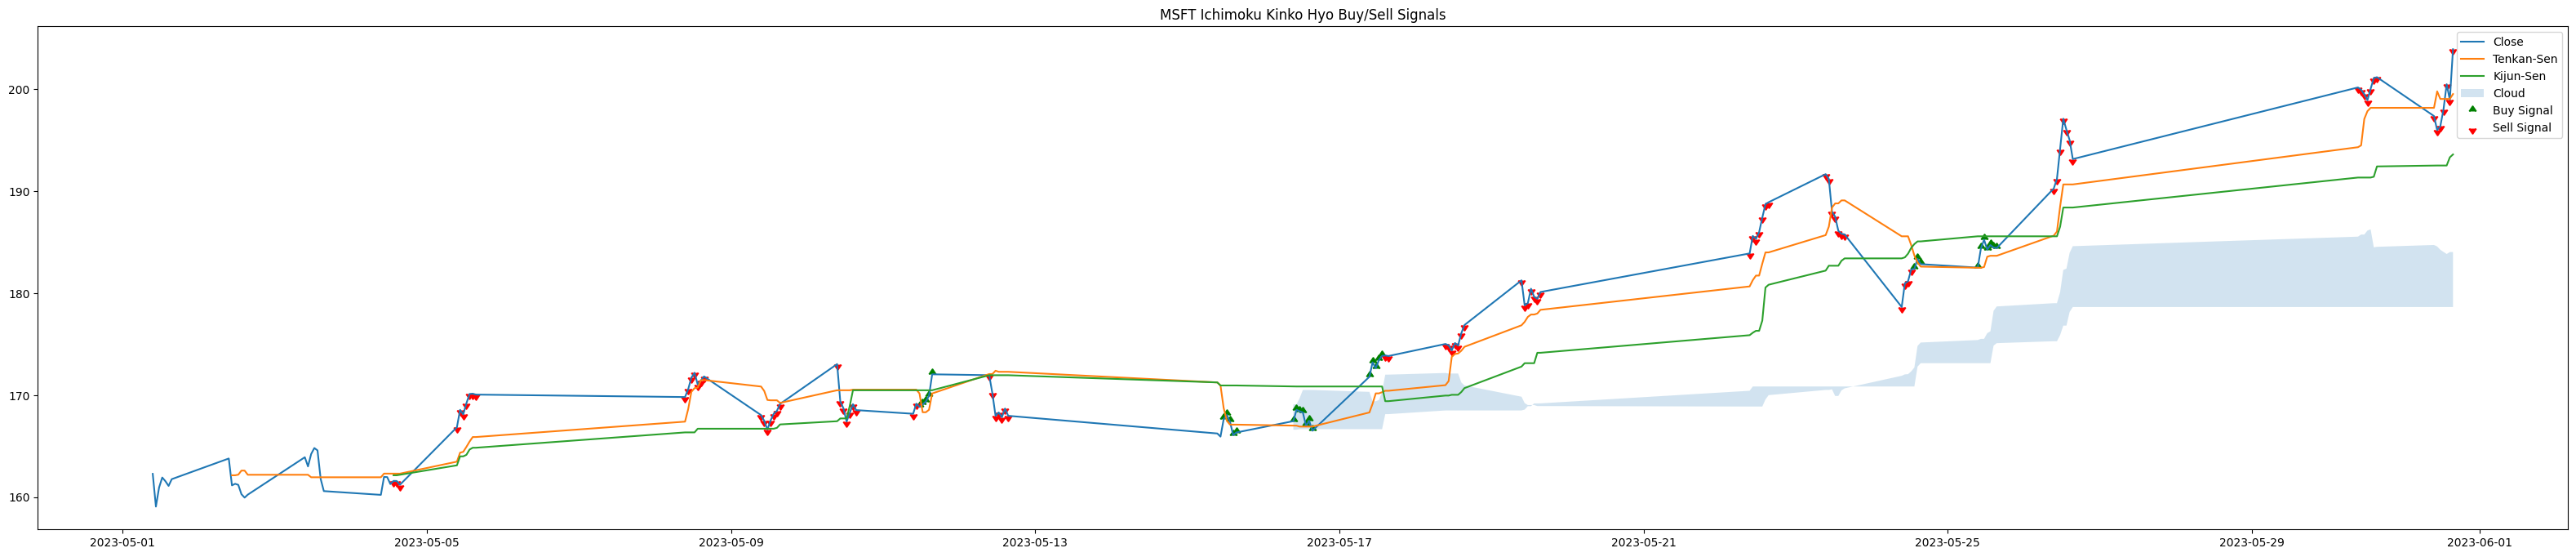

In [92]:
# Calculate buy and sell signals based on the Tenkan-Sen and Kijun-Sen lines
msft_ichimoku['Buy Signal'] = np.where(msft_ichimoku['Tenkan-Sen'] < msft_ichimoku['Kijun-Sen'], 1, 0)
msft_ichimoku['Sell Signal'] = np.where(msft_ichimoku['Tenkan-Sen'] > msft_ichimoku['Kijun-Sen'], -1, 0)

# Plot the price data, Tenkan-Sen and Kijun-Sen lines, and the Cloud
plt.figure(figsize=(40,8))
plt.plot(msft_ichimoku['Close'], label='Close')
plt.plot(msft_ichimoku['Tenkan-Sen'], label='Tenkan-Sen')
plt.plot(msft_ichimoku['Kijun-Sen'], label='Kijun-Sen')
plt.fill_between(msft_ichimoku.index, msft_ichimoku['Senkou Span A'], msft_ichimoku['Senkou Span B'], alpha=0.2, label='Cloud')

# Plot the buy and sell signals
plt.scatter(msft_ichimoku.loc[msft_ichimoku['Buy Signal'] == 1].index, msft_ichimoku['Close'][msft_ichimoku['Buy Signal'] == 1], color='green', label='Buy Signal', marker=10)
plt.scatter(msft_ichimoku.loc[msft_ichimoku['Sell Signal'] == -1].index, msft_ichimoku['Close'][msft_ichimoku['Sell Signal'] == -1], color='red', label='Sell Signal', marker=11)

# Add legend, title, and show the plot
plt.legend()
plt.title('MSFT Ichimoku Kinko Hyo Buy/Sell Signals')
plt.show()


In [93]:
def ichimoku_strategy(df, capital):
    # Generate buy/sell signals for trading
    df['Buy Signal'] = np.where(df['Tenkan-Sen'] > df['Kijun-Sen'], 1, 0)
    df['Sell Signal'] = np.where(df['Tenkan-Sen'] < df['Kijun-Sen'], -1, 0)

    # Determine the price series to trade on
    price = df['Close']

    # Initial cash on hand
    cash = capital

    # Initial number of shares held
    shares = 0

    # Set the time period for trading
    start_date = df.index[0]
    end_date = df.index[-1]

    # Perform buy/sell trades
    for date, row in df[start_date:end_date].iterrows():
        if row['Buy Signal'] == 1: # Buy signal received
            shares_to_buy = cash / price[date] # Number of shares to purchase
            shares += shares_to_buy # Increase number of shares held
            cash = 0 # Set cash on hand to zero
        elif row['Sell Signal'] == -1: # Sell signal received
            cash += shares * price[date] # Sell shares and increase cash on hand
            shares = 0 # Set number of shares held to zero
    final_value = cash + shares * price[end_date] # Final portfolio value
    return final_value


In [94]:
# Set the initial capital
capital = 10000

# Call the ichimoku strategy function to calculate the final portfolio value
final_value = ichimoku_strategy(msft_ichimoku, capital)

# Calculate the profit ratio as a percentage
profit_ratio = ((final_value / capital) - 1) * 100

# Print the results
print("The initial capital of {} USD turned into {} USD after the trading period.".format(capital, final_value))
print("Total profit/loss ratio: {:.2f}%".format(profit_ratio))

The initial capital of 10000 USD turned into 11449.21898837957 USD after the trading period.
Total profit/loss ratio: 14.49%
